# Display file for the moduel signal_analysis

# Before using it please run the matlab code resampling.m, if there is no 'resampled_low_noise_data.mat', to export a matlab.mat due to the scipy.resample cannot cover my situation

## import the resampled signal and plot

In [2]:
import sys
sys.path.append("..")
import signal_analysis as sa
import numpy as np

In [11]:
x,t,Fs = sa.Resample('resampled_low_noise_data.mat').resampleSignal()

In [4]:
x

array([-22.0863223 , -22.15070945, -21.64594356, ..., -13.33644333,
       -13.3365232 , -13.35145592])

In [5]:
t

array([0.00000000e+00, 6.05940465e-03, 1.21188093e-02, ...,
       2.00154255e+02, 2.00160314e+02, 2.00166373e+02])

In [6]:
Fs

165.03271478007474

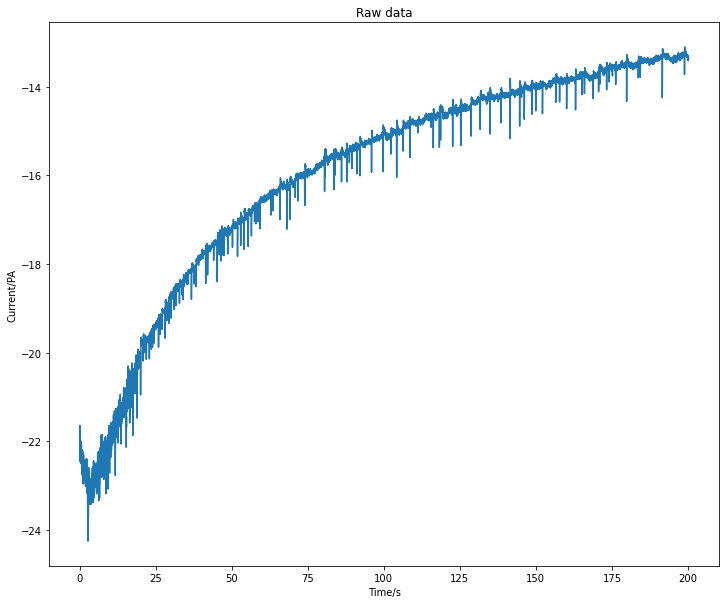

In [7]:
sa.Resample('resampled_low_noise_data.mat').PlotSignal()

## Denoise by stft or swt methods

If you want to see the mesh plot Y/n: y


<Figure size 432x288 with 0 Axes>

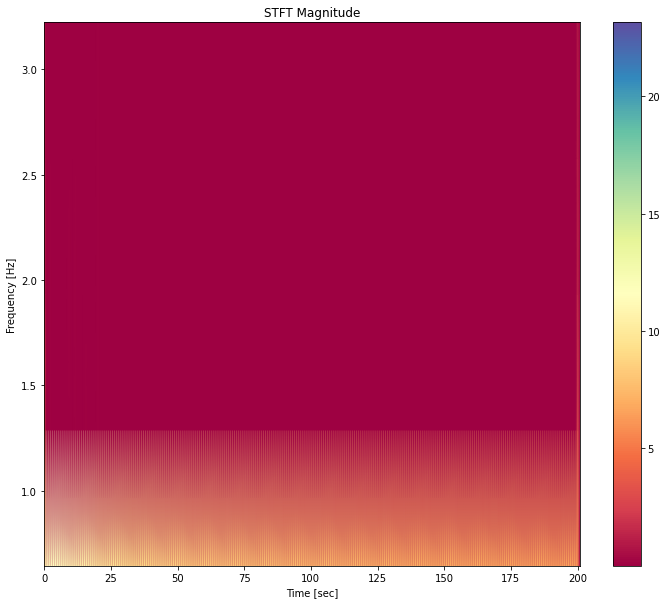

the high boundary power to perform istft,defaulted 15: 
If you want to see the denoised plot Y/n: y


<Figure size 864x720 with 0 Axes>

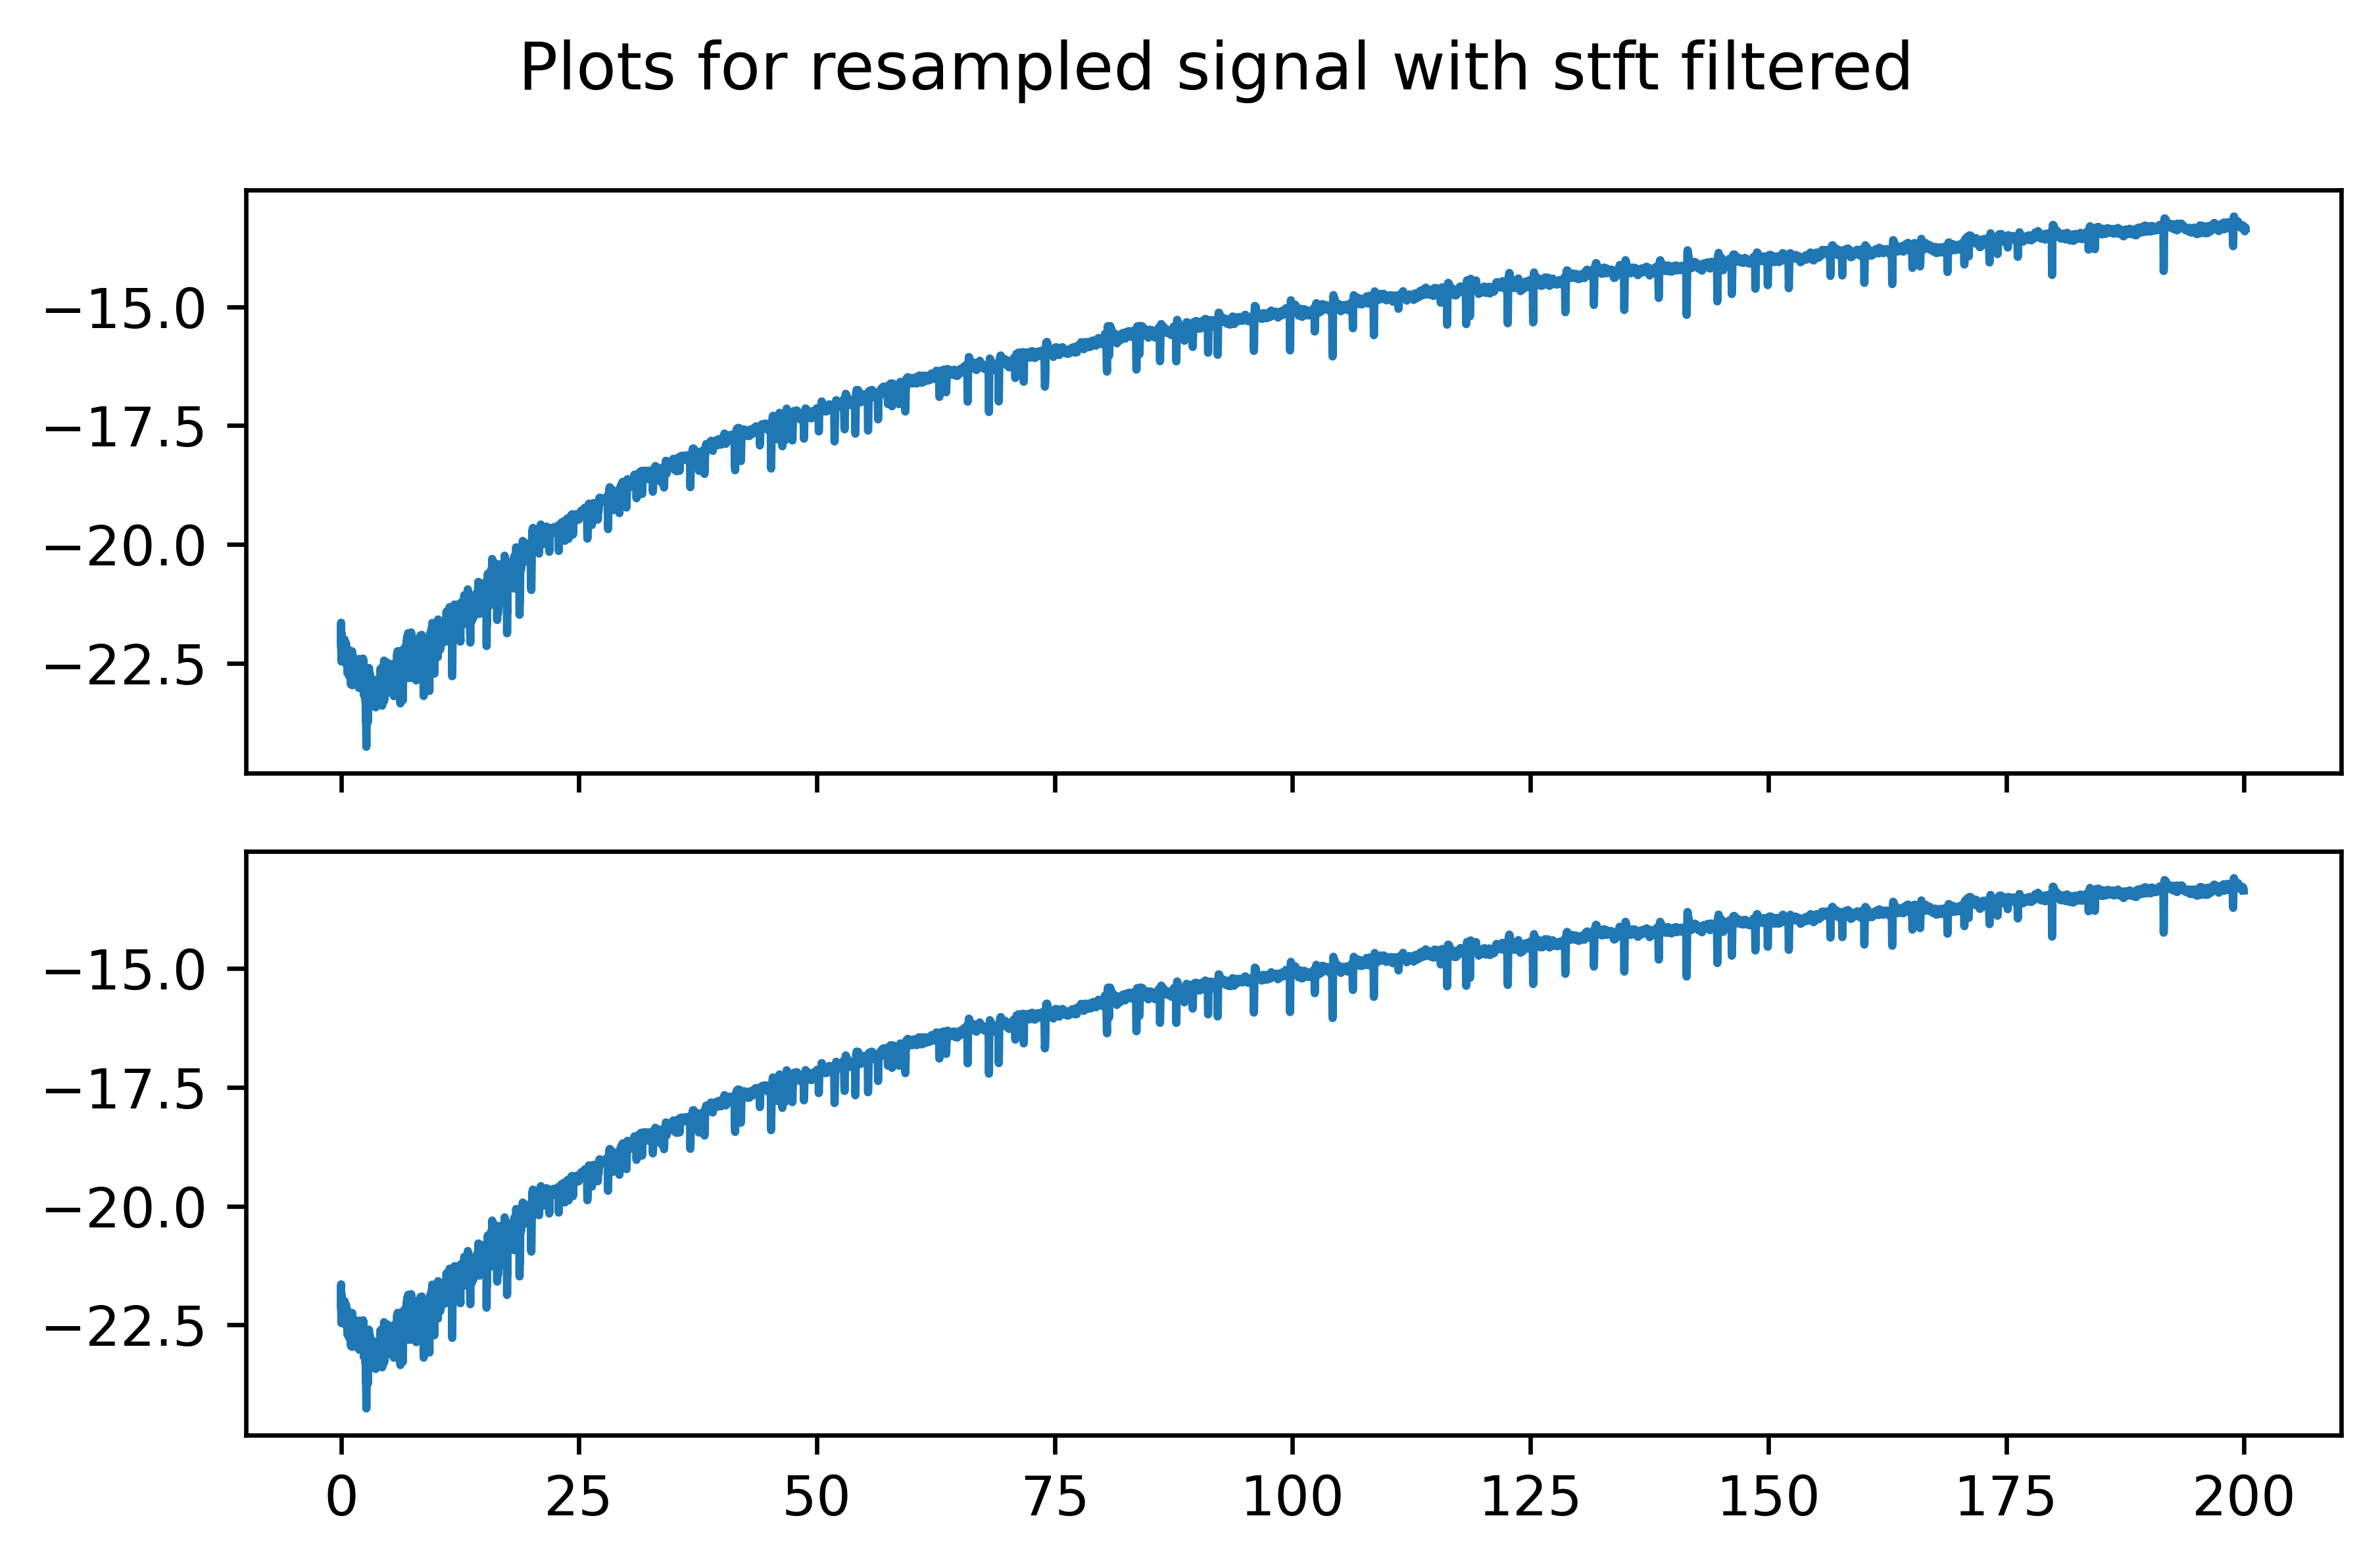

In [12]:
t_stft,x_stft = sa.PreDenoise(x, t, Fs).stftDenoise()

input the name mother wave to decompose, eg.db1,default sym4: 
input the level for composation, a scala better not over 5: 
If you want to see the denoised plot Y/n: y


<Figure size 864x720 with 0 Axes>

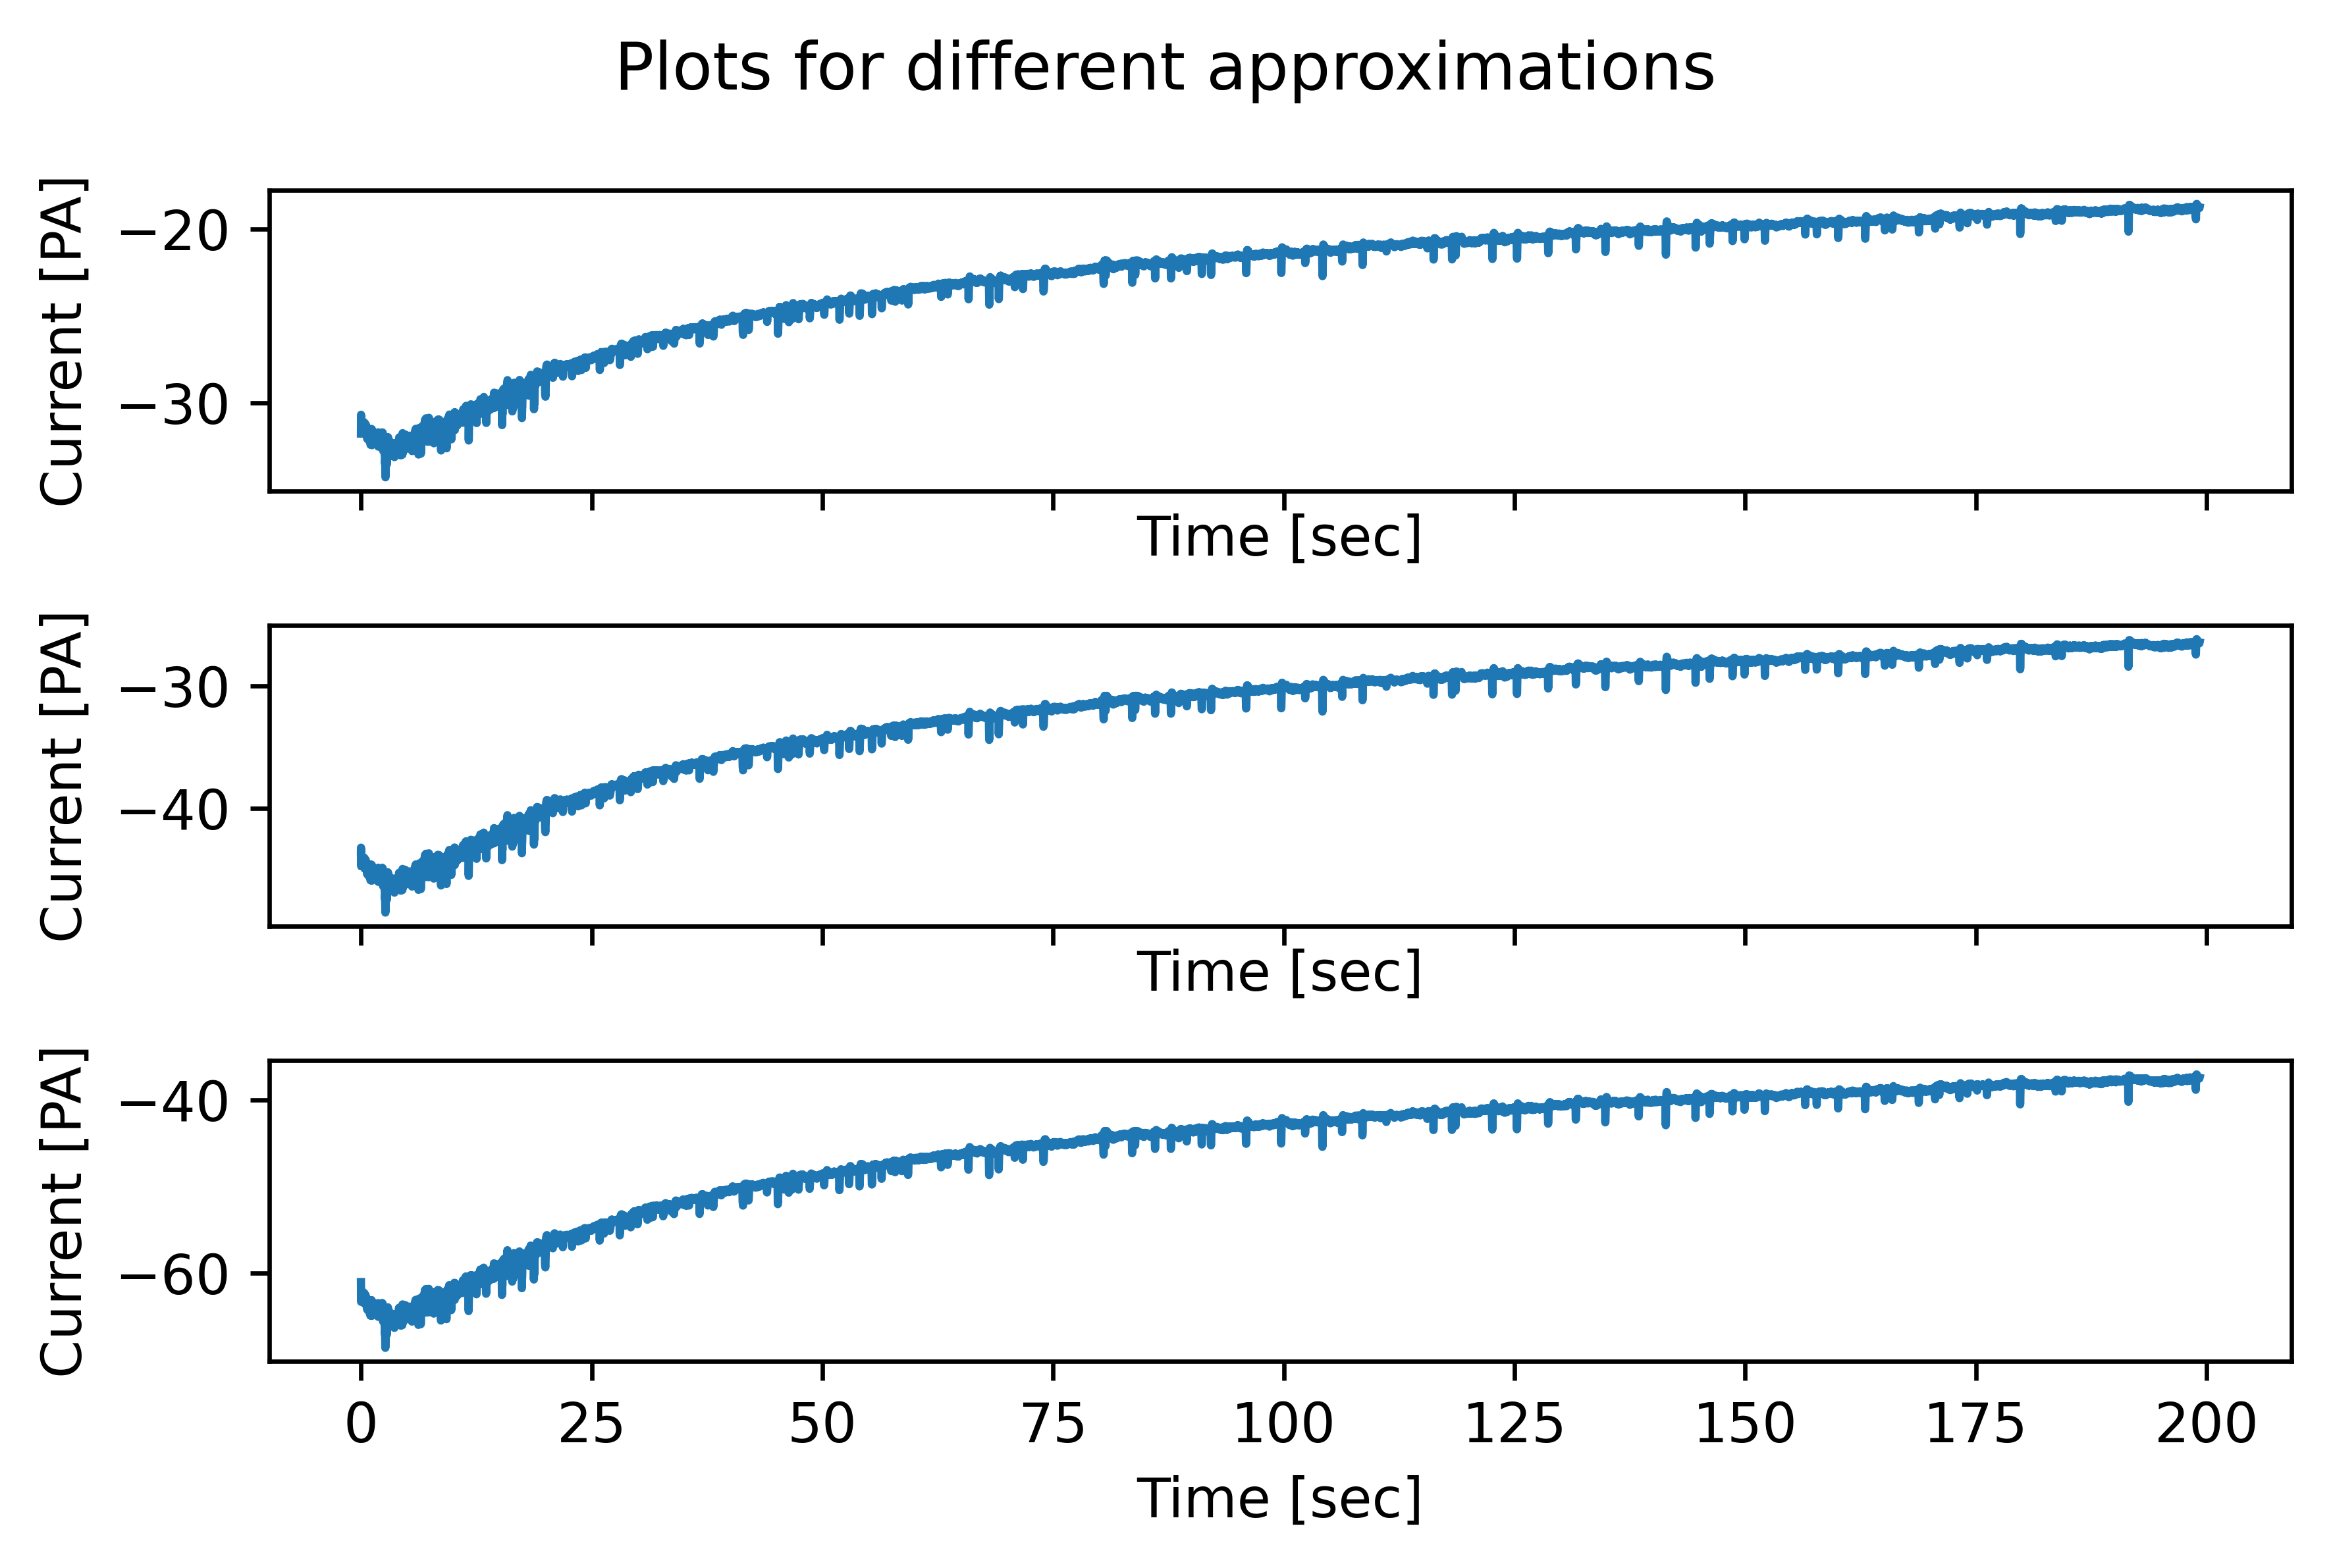

In [15]:
t_swt,x_a,_ = sa.PreDenoise(x, t, Fs).swtDenoise()

In [ ]:
## Find peaks and Clustering the peaks

If you want to see the curve with found peaks Y/n: y


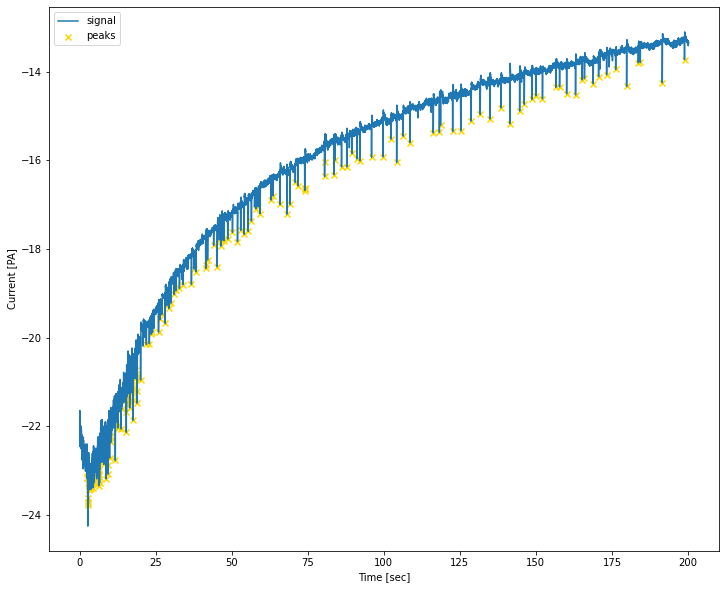

If you want to see the distribution of peaks Y/n: y


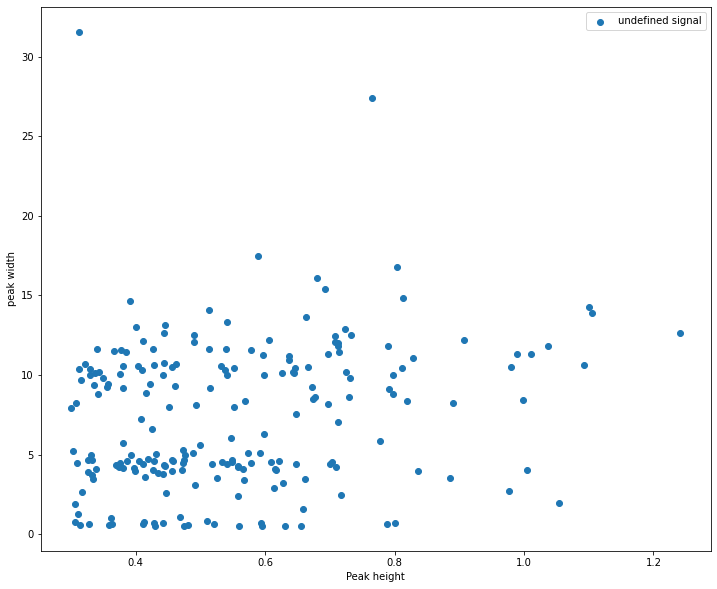

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


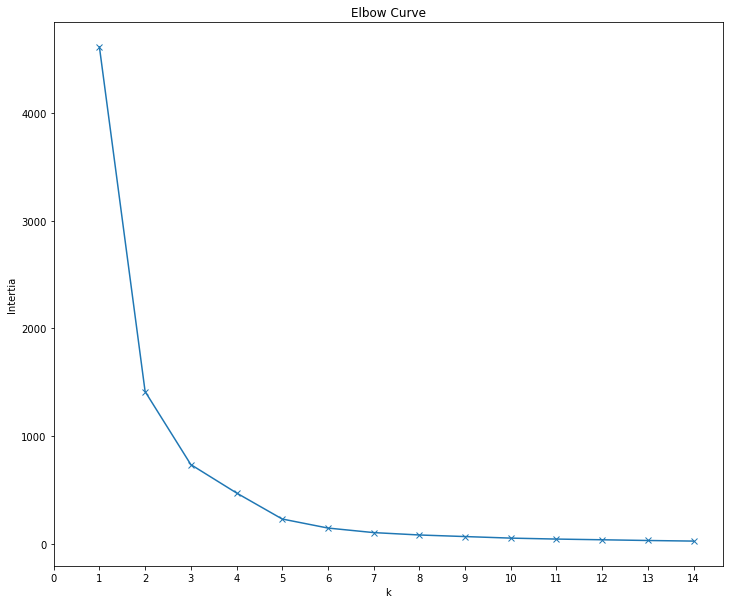

Input at which cluster numbers according to the curve, dafult.5: 


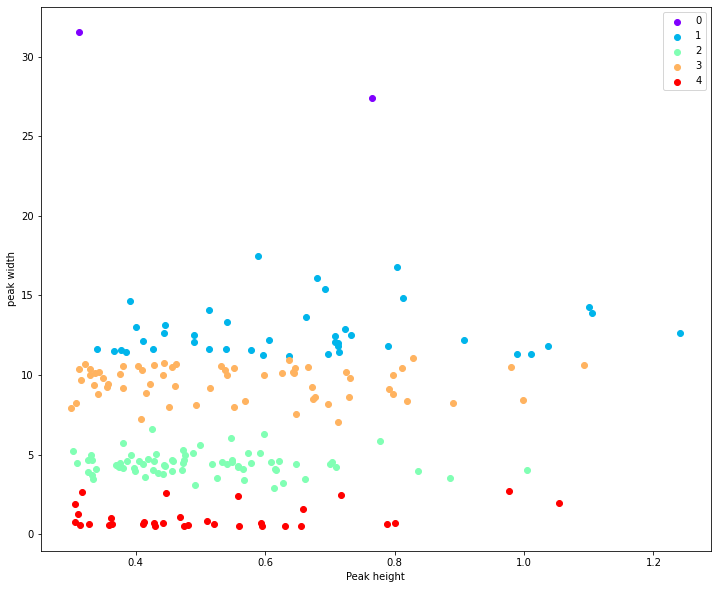

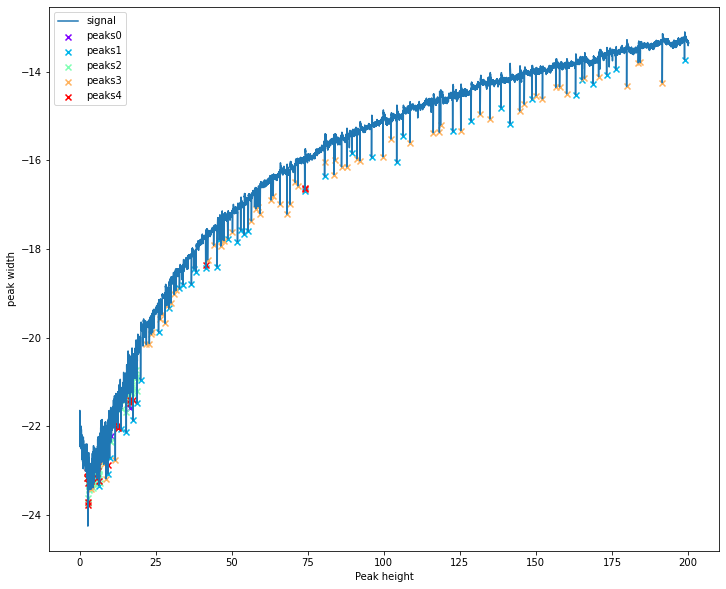

In [11]:
km,pred = sa.PeakClustering(x, t, Fs).ClusteringPeaks()

## clustering on the denoised plot

If you want to see the curve with found peaks Y/n: y


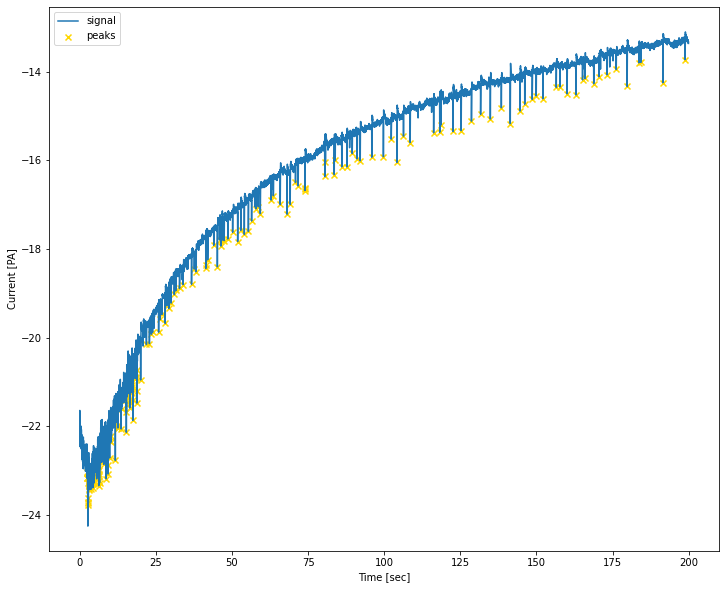

If you want to see the distribution of peaks Y/n: y


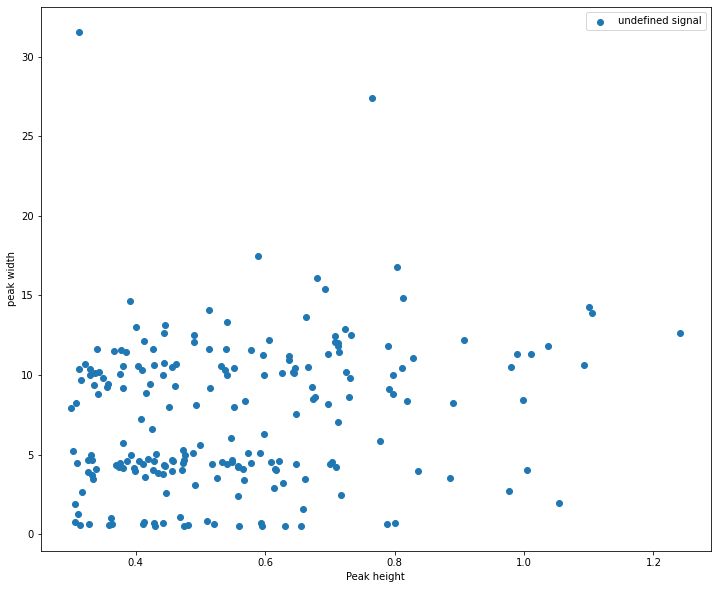

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


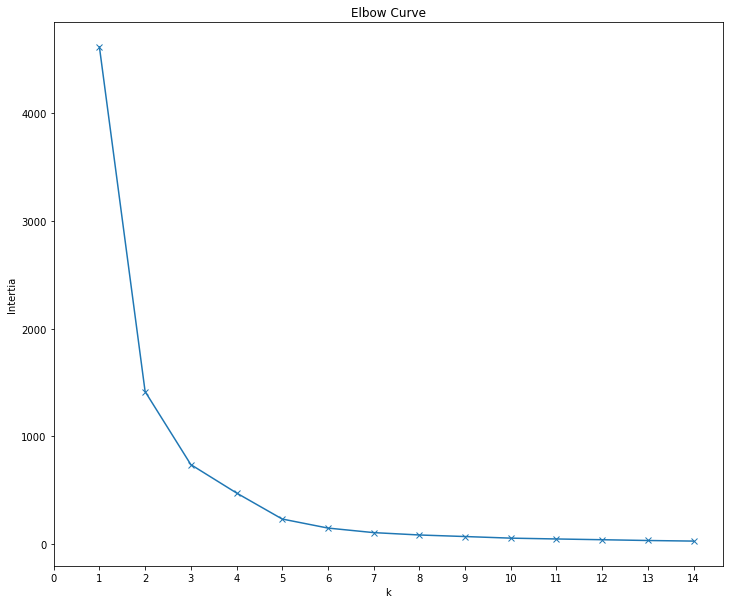

Input at which cluster numbers according to the curve, dafult.5: 


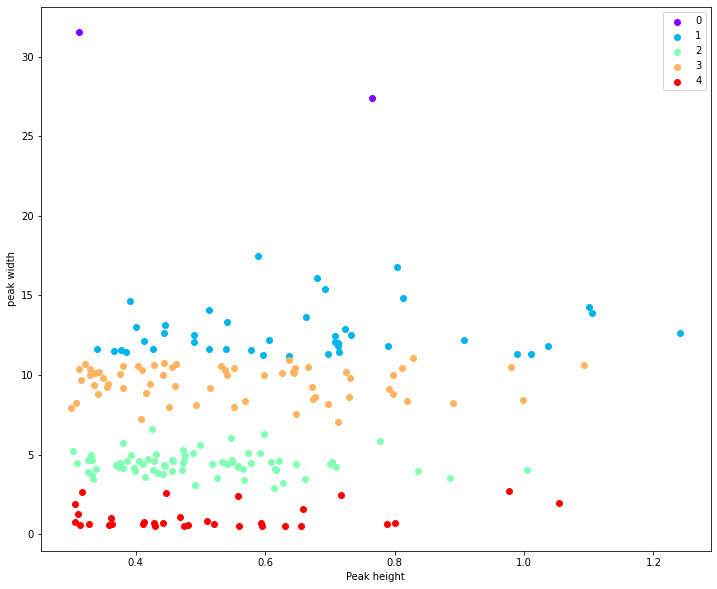

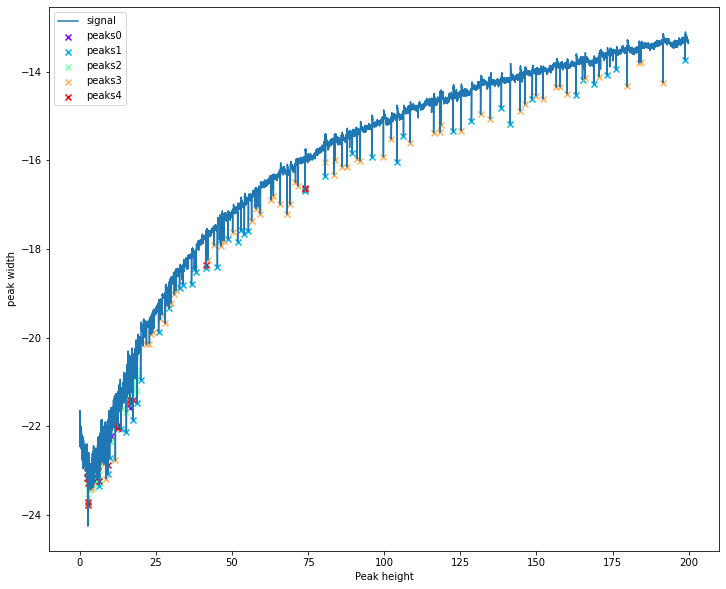

In [14]:
km_stft,pred_stft = sa.PeakClustering(x_stft, t_stft, Fs).ClusteringPeaks()

## Clustering on the swt denoised signal

If you want to see the curve with found peaks Y/n: y


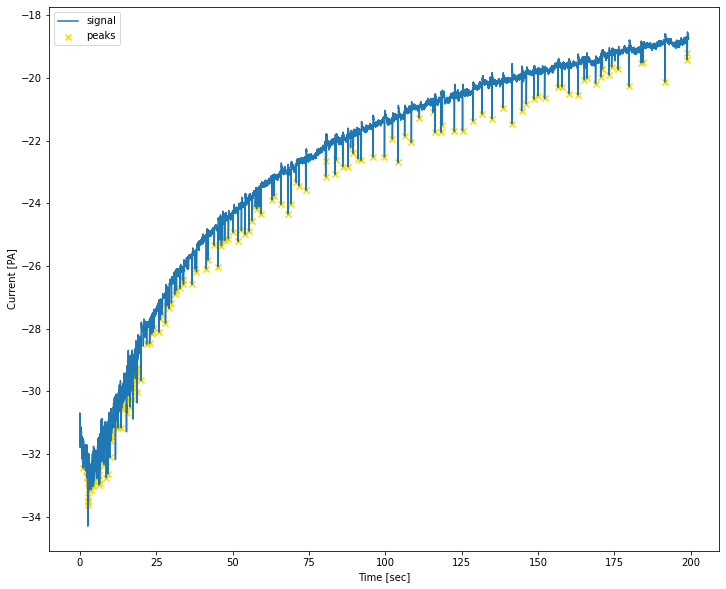

If you want to see the distribution of peaks Y/n: y


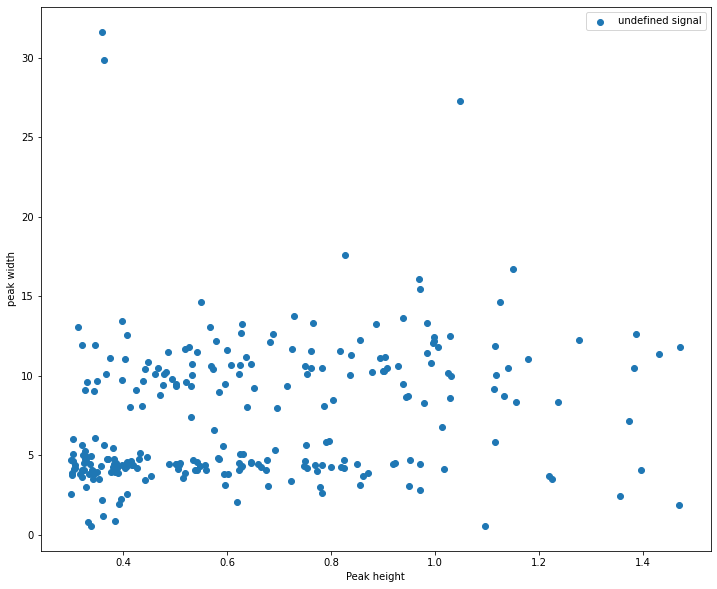

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


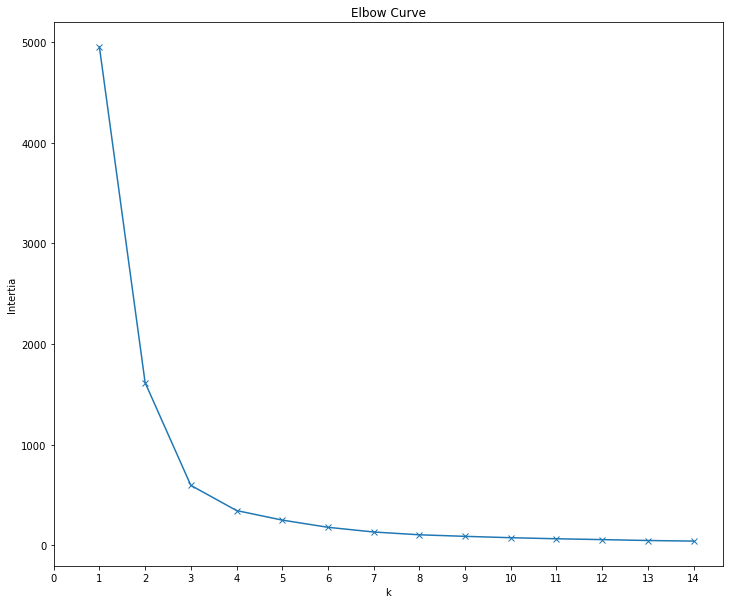

Input at which cluster numbers according to the curve, dafult.5: 


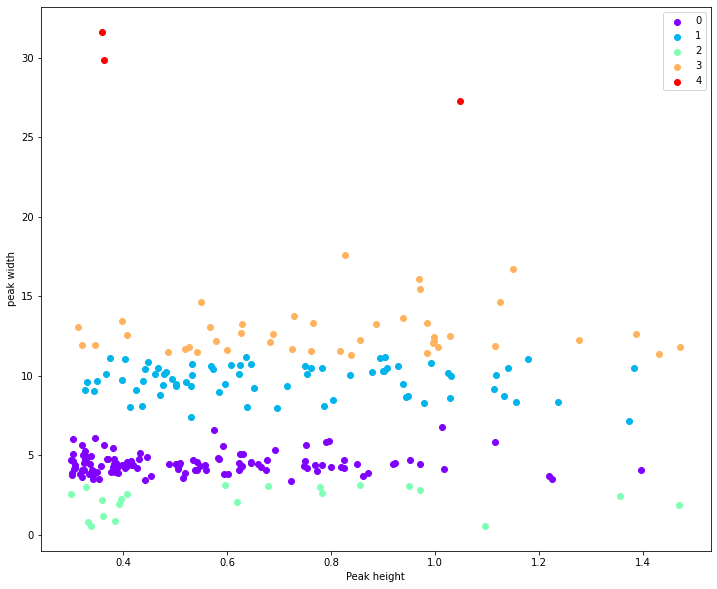

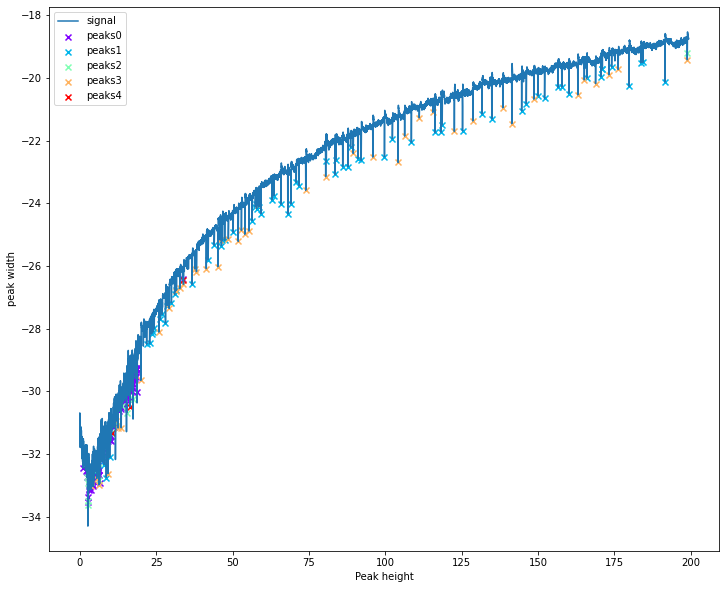

In [24]:
x_swt = x_a[:,0]
km_swt,pred_swt = sa.PeakClustering(x_swt, t_swt, Fs).ClusteringPeaks()